In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import textstat
import os
from textblob import TextBlob
from pathlib import Path

In [2]:
if not os.path.exists('figures'):
    os.makedirs('figures')

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

[nltk_data] Downloading package punkt to /home/sam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/sam/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
#Data

notebook_dir = Path().resolve()
data_dir = notebook_dir.parent.parent / "data"
test_data = pd.read_csv(data_dir / "drugsComTest_raw.tsv", sep='\t')
train_data = pd.read_csv(data_dir / "drugsComTrain_raw.tsv", sep='\t')
df = pd.concat([train_data, test_data], axis=0)

In [4]:
# Display basic information
print("="*50)
print("Basic Information")
print("="*50)
print(f"Number of reviews: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Display first few rows
print("\nSample data:")
display(df.head())

Basic Information
Number of reviews: 215063
Number of columns: 7

Data types:
Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

Missing values:
Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

Sample data:


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
# 1. Basic Statistics
print("="*50)
print("Basic Statistics")
print("="*50)
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

Basic Statistics

Descriptive statistics for numerical columns:


,Unnamed: 0,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


Rating Distribution


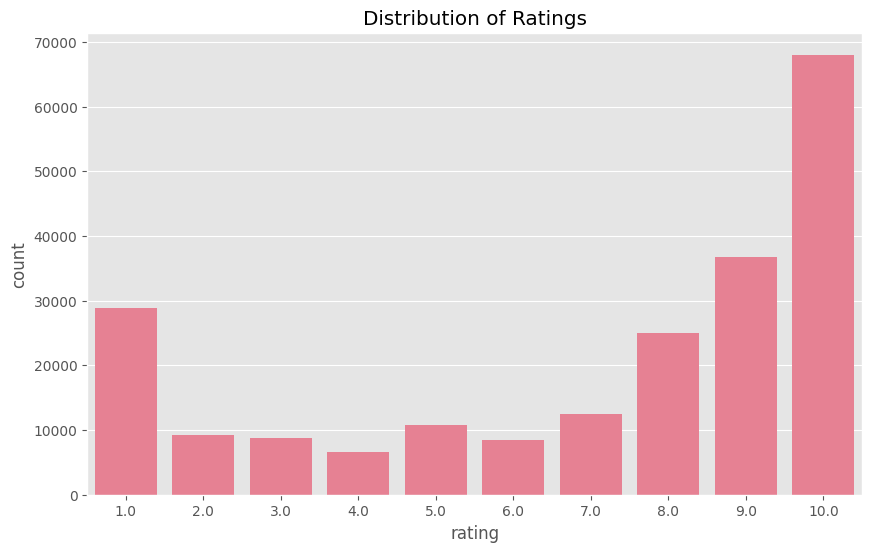

In [6]:
# 2. Rating Distribution
if 'rating' in df.columns:
    print("="*50)
    print("Rating Distribution")
    print("="*50)
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x='rating', data=df)
    plt.title('Distribution of Ratings')
    plt.savefig('figures/rating_distribution.png', bbox_inches='tight', dpi=300)
    plt.show()

Useful Count Analysis


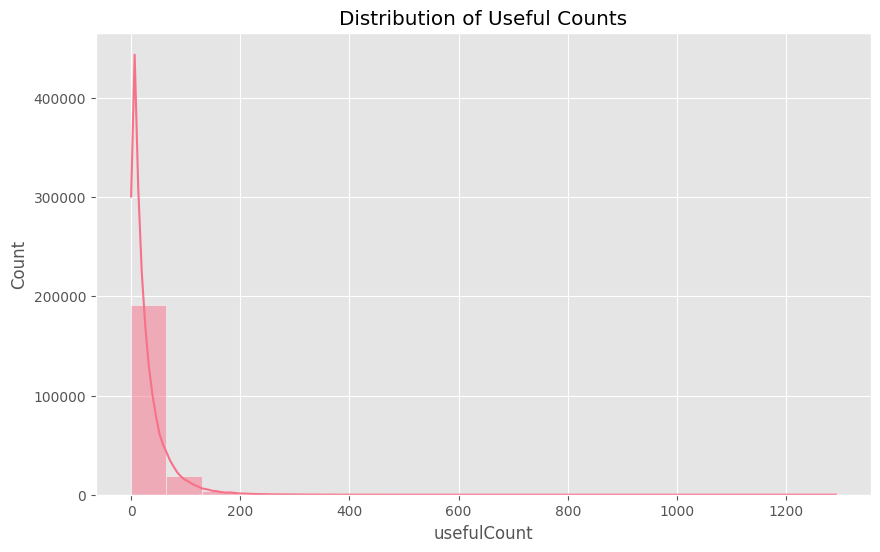

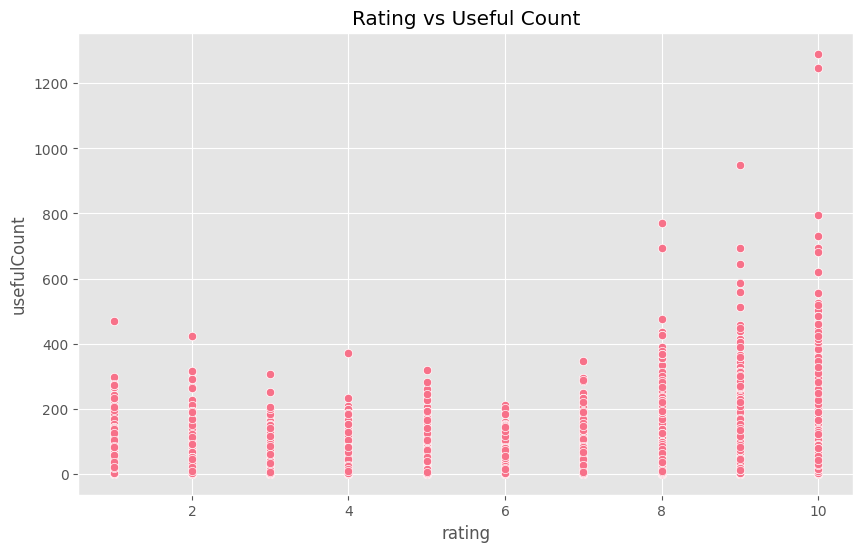

In [7]:
# 3. Useful Count Analysis
if 'usefulCount' in df.columns:
    print("="*50)
    print("Useful Count Analysis")
    print("="*50)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['usefulCount'], bins=20, kde=True)
    plt.title('Distribution of Useful Counts')
    plt.savefig('figures/useful_count_distribution.png', bbox_inches='tight', dpi=300)
    plt.show()
    
    # Relationship between rating and useful count
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='rating', y='usefulCount', data=df)
    plt.title('Rating vs Useful Count')
    plt.savefig('figures/rating_vs_useful_count.png', bbox_inches='tight', dpi=300)
    plt.show()

Drug Analysis

Top Drugs:


drugName
Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Name: count, dtype: int64

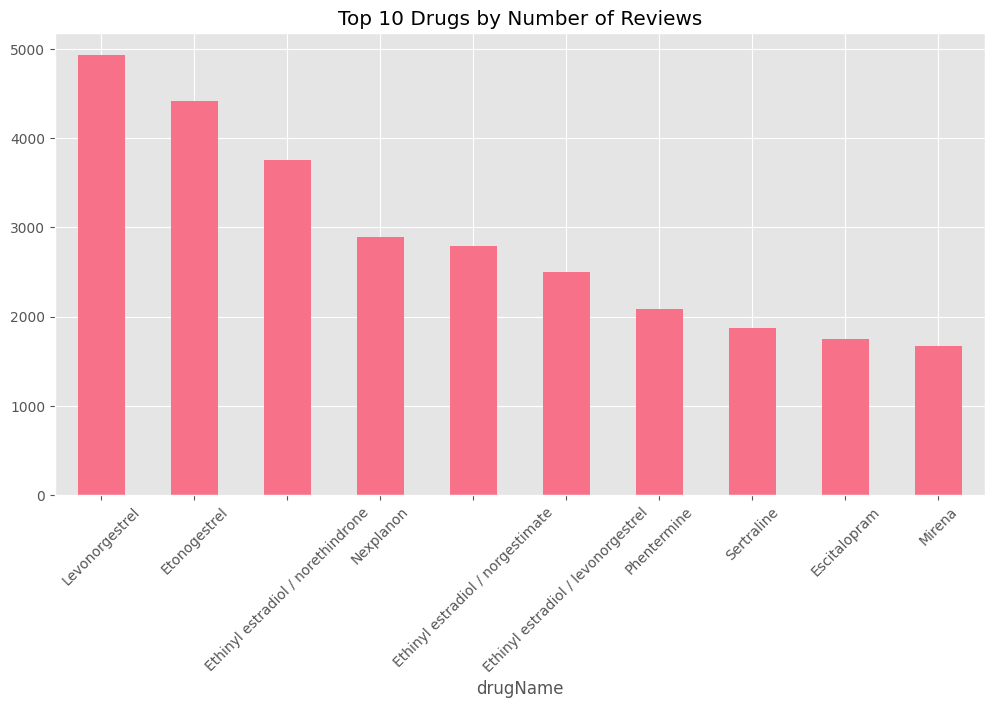


Top Conditions:


condition
Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: count, dtype: int64

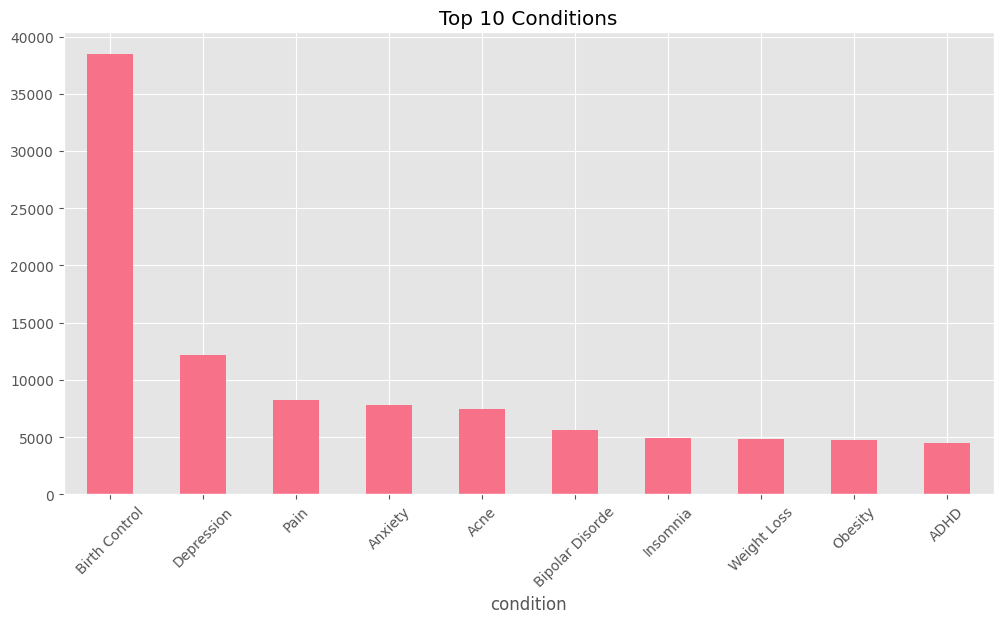

In [8]:
# 4. Drug and Condition Analysis
if 'drugName' in df.columns:
    print("="*50)
    print("Drug Analysis")
    print("="*50)
    
    print("\nTop Drugs:")
    display(df['drugName'].value_counts().head(10))
    
    plt.figure(figsize=(12, 6))
    df['drugName'].value_counts().head(10).plot(kind='bar')
    plt.title('Top 10 Drugs by Number of Reviews')
    plt.xticks(rotation=45)
    plt.savefig('figures/top_drugs.png', bbox_inches='tight', dpi=300)
    plt.show()

if 'condition' in df.columns:
    print("\nTop Conditions:")
    display(df['condition'].value_counts().head(10))
    
    plt.figure(figsize=(12, 6))
    df['condition'].value_counts().head(10).plot(kind='bar')
    plt.title('Top 10 Conditions')
    plt.xticks(rotation=45)
    plt.savefig('figures/top_conditions.png', bbox_inches='tight', dpi=300)
    plt.show()

Text Analysis

Calculating basic text statistics...


100%|███████████████████████████████| 215063/215063 [00:00<00:00, 299281.03it/s]


Review Length Statistics:


,review_length,word_count
count,215063.000000,215063.000000
mean,458.620748,84.682228
std,240.995226,44.852532
min,3.000000,1.000000
25%,262.000000,48.000000
50%,456.000000,84.000000
75%,690.000000,126.000000
max,10787.000000,1894.000000



Creating visualizations...


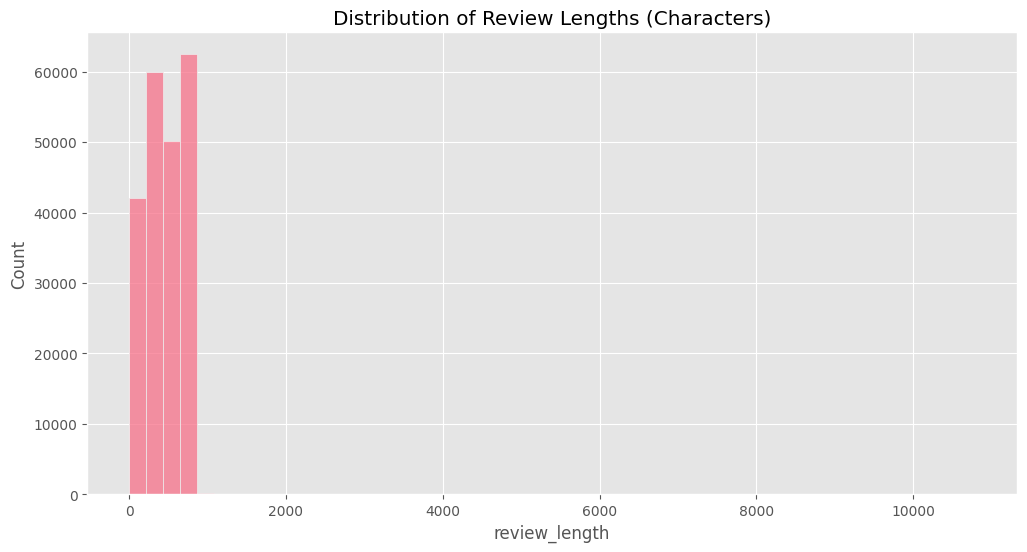

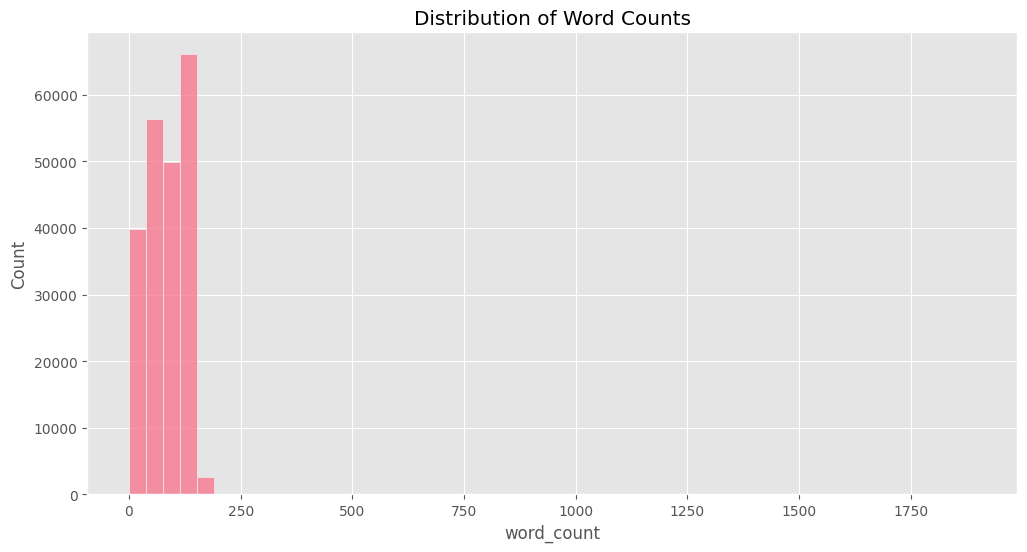


Tokenizing text (on sample)...

Calculating word frequencies...

Top 20 most common words:
[('taking', 507), ('side', 489), ('get', 436), ('first', 410), ('take', 405), ('day', 405), ('started', 382), ('like', 382), ('pain', 330), ('would', 326), ('years', 315), ('feel', 307), ('months', 298), ('one', 284), ('days', 274), ('time', 270), ('back', 269), ('effects', 262), ('still', 259), ('got', 259)]


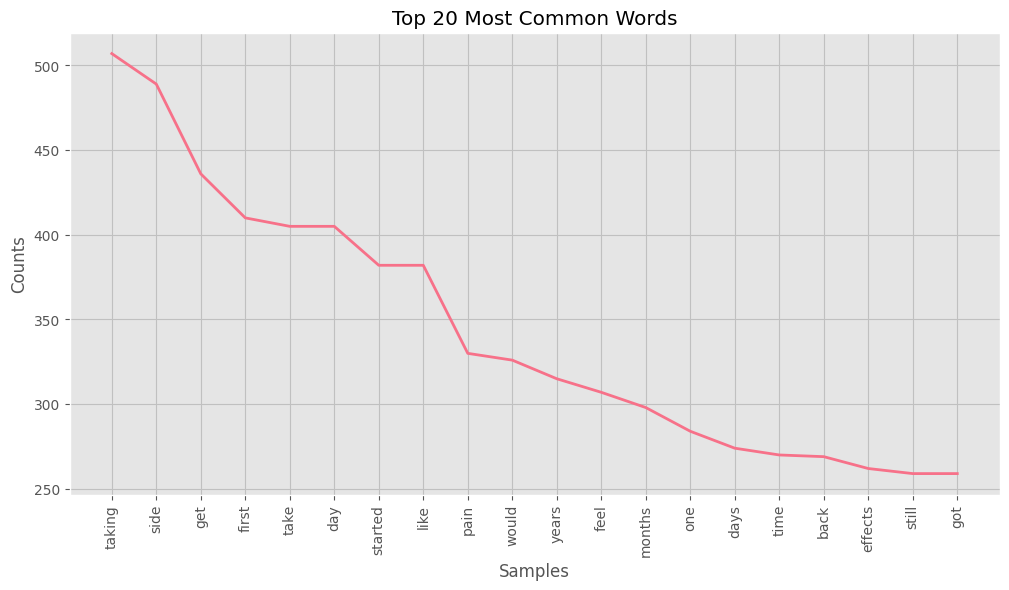


Generating word cloud...


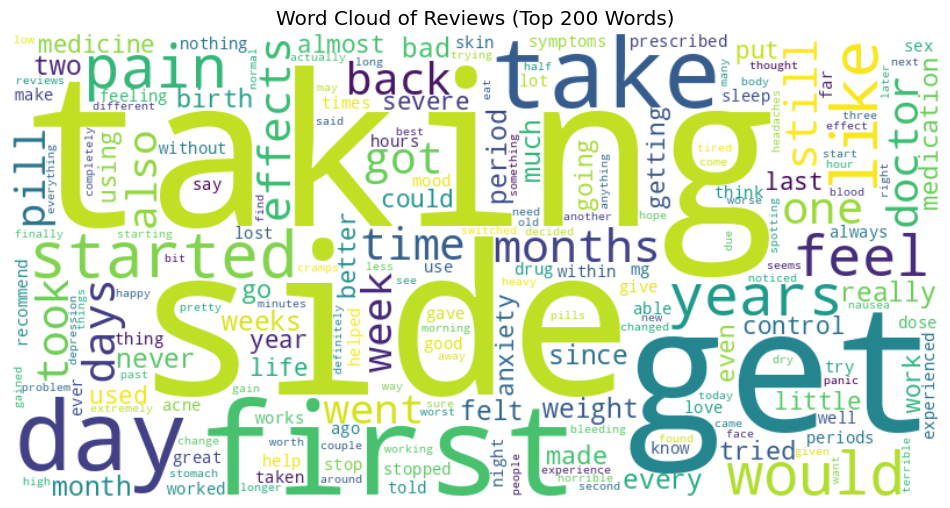


Calculating readability scores...


100%|████████████████████████████████████| 5000/5000 [00:00<00:00, 83385.10it/s]


Readability Scores (Sample):


,flesch_reading_ease,smog_index,lexicon_count
count,5000.000000,5000.000000,5000.000000
mean,73.365389,9.160450,84.267800
std,14.143330,2.344155,44.259497
min,-63.213421,3.129100,1.000000
25%,66.776197,7.957252,48.000000
50%,74.782820,9.120679,83.000000
75%,81.550266,10.504224,126.000000
max,121.220000,29.308192,520.000000


In [10]:
# 5. Text Analysis (Optimized Version)
if 'review' in df.columns:
    print("="*50)
    print("Text Analysis")
    print("="*50)
    
    try:
        from tqdm import tqdm
        tqdm.pandas()
        
        # Sample data if too large (adjust sample size as needed)
        sample_size = 5000 if len(df) > 10000 else len(df)
        df_sample = df.sample(min(sample_size, len(df)), random_state=42) if len(df) > 5000 else df
        
        # Calculate basic text statistics (fast operations)
        print("\nCalculating basic text statistics...")
        df['review_length'] = df['review'].progress_apply(len)
        df['word_count'] = df['review'].progress_apply(lambda x: len(x.split()))
        
        print("\nReview Length Statistics:")
        display(df[['review_length', 'word_count']].describe())
        
        # Visualizations
        print("\nCreating visualizations...")
        plt.figure(figsize=(12, 6))
        sns.histplot(df['review_length'], bins=50)
        plt.title('Distribution of Review Lengths (Characters)')
        plt.savefig('figures/review_length_distribution.png', bbox_inches='tight', dpi=300)
        plt.show()
        
        plt.figure(figsize=(12, 6))
        sns.histplot(df['word_count'], bins=50)
        plt.title('Distribution of Word Counts')
        plt.savefig('figures/word_count_distribution.png', bbox_inches='tight', dpi=300)
        plt.show()
        
        # Tokenization on sample only
        print("\nTokenizing text (on sample)...")
        all_words = ' '.join(df_sample['review']).lower()
        
        # Faster tokenization
        tokens = word_tokenize(all_words) if len(all_words) < 1000000 else all_words.split()[:1000000]
        
        # Remove stopwords and punctuation (optimized)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words][:50000]  # Limit to top 50k tokens
        
        # Most common words
        print("\nCalculating word frequencies...")
        freq_dist = FreqDist(filtered_tokens)
        print("\nTop 20 most common words:")
        print(freq_dist.most_common(20))
        
        plt.figure(figsize=(12, 6))
        freq_dist.plot(20, title='Top 20 Most Common Words')
        plt.savefig('figures/top_common_words.png', bbox_inches='tight', dpi=300)
        plt.show()
        
        # Word cloud (on most common words only)
        print("\nGenerating word cloud...")
        top_words = dict(freq_dist.most_common(200))  # Only top 200 words
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Reviews (Top 200 Words)')
        plt.savefig('figures/word_cloud.png', bbox_inches='tight', dpi=300)
        plt.show()
        
        # POS tagging (on sample only)
        if 'averaged_perceptron_tagger' in nltk.data.find('taggers'):
            print("\nPerforming POS tagging...")
            tagged = nltk.pos_tag(filtered_tokens[:10000])  # Only tag first 10k tokens
            pos_counts = Counter(tag for word, tag in tagged)
            
            plt.figure(figsize=(12, 6))
            pd.DataFrame.from_dict(pos_counts, orient='index').sort_values(0, ascending=False).head(15).plot(kind='bar', legend=False)
            plt.title('Top 15 Part-of-Speech Tags (Sample)')
            plt.savefig('figures/pos_tags.png', bbox_inches='tight', dpi=300)
            plt.show()
        
        # Readability scores (on sample)
        print("\nCalculating readability scores...")
        df_sample['flesch_reading_ease'] = df_sample['review'].progress_apply(textstat.flesch_reading_ease)
        df_sample['smog_index'] = df_sample['review'].progress_apply(textstat.smog_index)
        df_sample['lexicon_count'] = df_sample['review'].progress_apply(textstat.lexicon_count)
        
        print("\nReadability Scores (Sample):")
        display(df_sample[['flesch_reading_ease', 'smog_index', 'lexicon_count']].describe())
            
    except Exception as e:
        print(f"Error in text analysis: {str(e)}")

Correlation Analysis


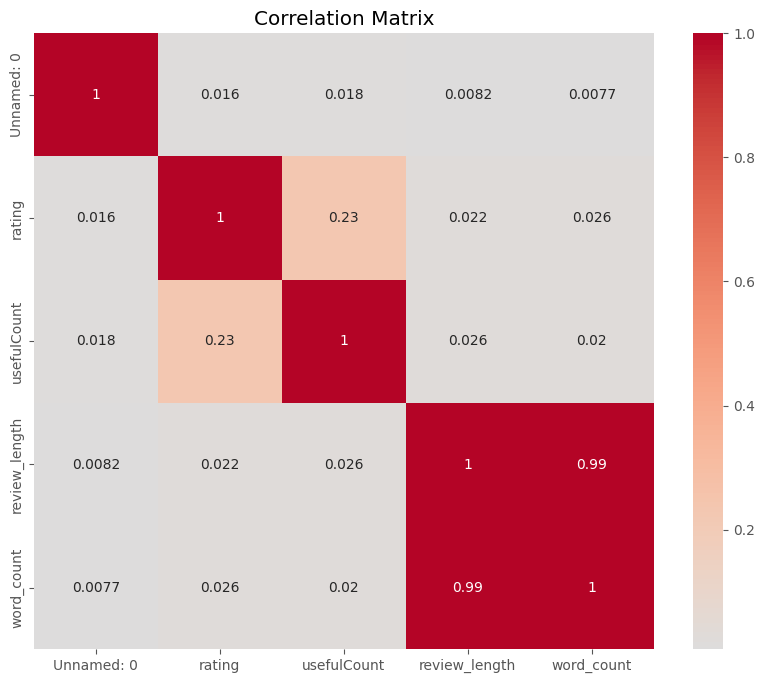

In [11]:
# 6. Correlation Analysis
print("="*50)
print("Correlation Analysis")
print("="*50)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) > 1:
    corr_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.savefig('figures/correlation_matrix.png', bbox_inches='tight', dpi=300)
    plt.show()